In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(full_train_images, full_train_labels), (full_test_images, full_test_labels) = mnist_dataset.load_data()

train_images = full_train_images[(full_train_labels == 1) | (full_train_labels == 7)]
train_labels = full_train_labels[(full_train_labels == 1) | (full_train_labels == 7)]

test_images = full_test_images[(full_test_labels == 1) | (full_test_labels == 7)]
test_labels = full_test_labels[(full_test_labels == 1) | (full_test_labels == 7)]

train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
saved_data = np.load('../output/relatif_comparison_on_binary_mnist.npz')
influence_values = saved_data['influence_values']
theta_relatif_values = saved_data['theta_relatif_values']
l_relatif_values = saved_data['l_relatif_values']

In [4]:
(num_training_points, num_test_points) = influence_values.shape
print("{} training points, {} test points.".format(num_training_points, num_test_points))

1000 training points, 100 test points.


In [5]:
influence_idxs = np.argsort(influence_values, axis=0)
theta_relatif_idxs = np.argsort(theta_relatif_values, axis=0)
l_relatif_idxs = np.argsort(l_relatif_values, axis=0)

## Visualising Most Influential Points

In [6]:
num_test_points_to_show = 8
num_most_influential_to_show = 5

### Influence Functions

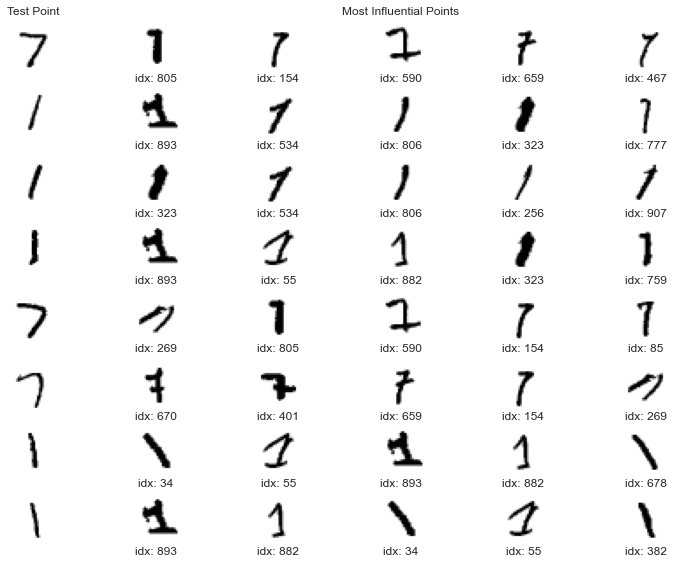

In [7]:
fig, ax = plt.subplots(
    num_test_points_to_show,
    num_most_influential_to_show+1,
    subplot_kw={'xticks':[], 'yticks':[]},
    figsize=(12.8, 9.6)
)
fig.subplots_adjust(hspace=0.4)

ax[0,0].set_title("Test Point")
ax[0,(num_most_influential_to_show+1)//2].set_title("Most Influential Points")

for i in range(num_test_points_to_show):
    ax[i,0].imshow(test_images[i], cmap=plt.cm.binary)
    for j in range(num_most_influential_to_show):
        ax[i,j+1].imshow(train_images[influence_idxs[j,i]], cmap=plt.cm.binary)
        ax[i,j+1].set_xlabel("idx: {}".format(influence_idxs[j,i]))

### $\theta$-Relatif

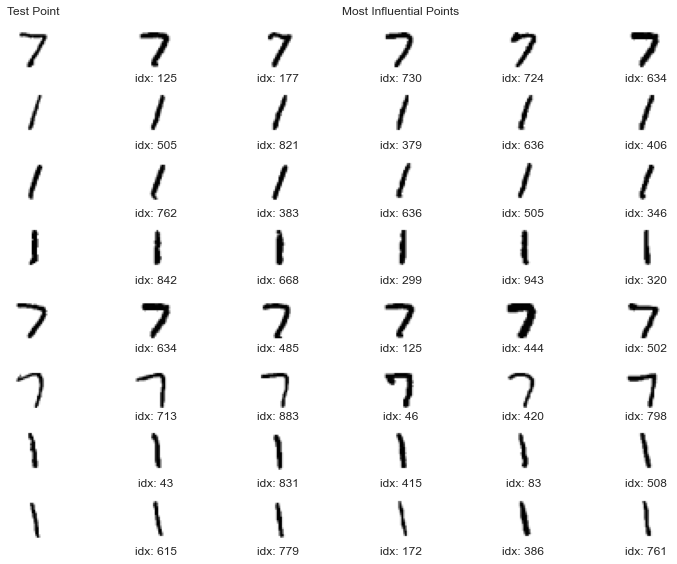

In [8]:
fig, ax = plt.subplots(
    num_test_points_to_show,
    num_most_influential_to_show+1,
    subplot_kw={'xticks':[], 'yticks':[]},
    figsize=(12.8, 9.6)
)
fig.subplots_adjust(hspace=0.4)

ax[0,0].set_title("Test Point")
ax[0,(num_most_influential_to_show+1)//2].set_title("Most Influential Points")

for i in range(num_test_points_to_show):
    ax[i,0].imshow(test_images[i], cmap=plt.cm.binary)
    for j in range(num_most_influential_to_show):
        ax[i,j+1].imshow(train_images[theta_relatif_idxs[j,i]], cmap=plt.cm.binary)
        ax[i,j+1].set_xlabel("idx: {}".format(theta_relatif_idxs[j,i]))

### $l$-Relatif

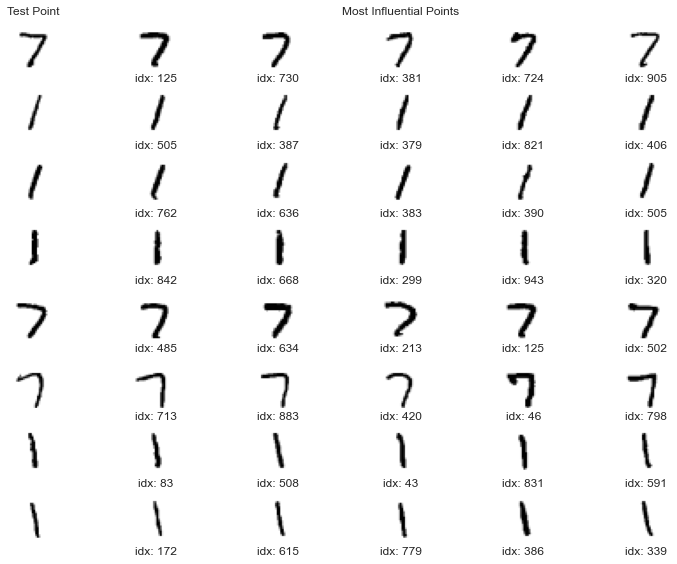

In [9]:
fig, ax = plt.subplots(
    num_test_points_to_show,
    num_most_influential_to_show+1,
    subplot_kw={'xticks':[], 'yticks':[]},
    figsize=(12.8, 9.6)
)
fig.subplots_adjust(hspace=0.4)

ax[0,0].set_title("Test Point")
ax[0,(num_most_influential_to_show+1)//2].set_title("Most Influential Points")

for i in range(num_test_points_to_show):
    ax[i,0].imshow(test_images[i], cmap=plt.cm.binary)
    for j in range(num_most_influential_to_show):
        ax[i,j+1].imshow(train_images[l_relatif_idxs[j,i]], cmap=plt.cm.binary)
        ax[i,j+1].set_xlabel("idx: {}".format(l_relatif_idxs[j,i]))

## Comparing Number of Unique Points

In [10]:
num_test_points_to_compare = 100
num_most_influential_to_include = 5

### Influence Functions

In [11]:
len(np.unique(influence_idxs[:num_most_influential_to_include, :num_test_points_to_compare]))

49

### $\theta$-RelatIF

In [12]:
len(np.unique(theta_relatif_idxs[:num_most_influential_to_include, :num_test_points_to_compare]))

298

### $l$-RelatIF

In [13]:
len(np.unique(l_relatif_idxs[:num_most_influential_to_include, :num_test_points_to_compare]))

313